In [112]:
import numpy as np
import matplotlib.pyplot as plt


In [113]:
def sin_function(params, start, end, num, uncertainty):
    return [params[0] + params[1] * x + params[2] * np.sin(params[4] * x) + params[3] * np.cos(params[4] * x) for x in np.linspace(start, end, num) + np.random.normal(0, uncertainty, num)]


In [114]:
start = 20
end = 35
num = 100
uncertainty = 0.5
x = np.linspace(start, end, num)
data = sin_function([0, 1, 1, 1, 0], start, end, num, uncertainty)

$$y(x)=0+1x+1sin(0x)+1cos(0x)$$
$$=x+1$$

In [115]:
def fitfunction(x,a,b,c,d,e):
        return a + b * x + c * np.sin(e * x) + d * np.cos(e * x)


Text(0, 0.5, 'Data')

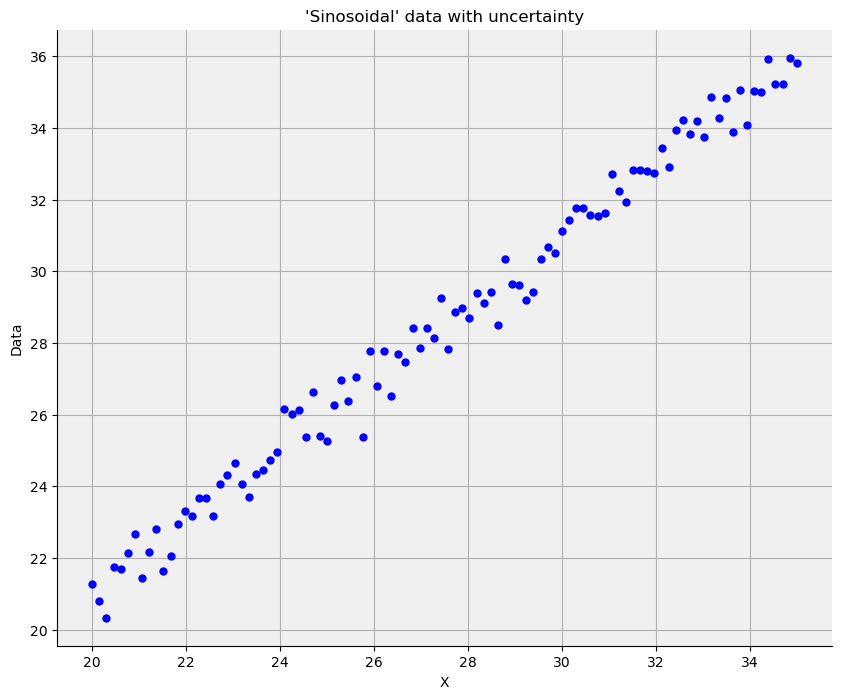

In [116]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot

plt.plot(x, data, color=line_color, linewidth=line_width,
    marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("\'Sinosoidal\' data with uncertainty")
plt.xlabel("X")
plt.ylabel("Data")
# plt.yscale("log")

In [117]:
from scipy.optimize import curve_fit


init_vals = [1, 1, 1, 1, 1]

popt, pcov = curve_fit(fitfunction, x, data, p0=init_vals)

print (popt)
print(np.diag(pcov))
# print (pcov)
yfit = []
chi2=0
for i in range (0,num):
    yfit.append(fitfunction(x[i],*popt))
    chi2 += (data[i]-yfit[i])*(data[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,num-len(init_vals)))

[1.40322134 0.98521905 0.13434135 0.10985628 0.80366579]
[0.11883618 0.00015404 0.095932   0.14280615 0.00958821]
Chi^2 / dof = 2.345E+01 / 95


These parameters $[1.15 \pm 0.16, 0.994 \pm 0.0002, -0.097 \pm 0.203, 0.107 \pm 0.178, 0.705 \pm 0.024]$ do not seem to agree with the expected parameters of $[0, 1, 1, 1, 0]$. However, when plugged into the fit equation we get $y(x) = 1 + x$ using the expected parameters and using $[1, 1, 0, 0, 0.7]$ which is an approximated (within the uncertainties) and rounded version of our fit parameters we get:
$$y(x) = 1 + 1x + 0\sin(0.7x) + 0\cos(0.7x)$$
$$y(x) = 1 + x$$ 
So we see that the parameters we found (within the uncertainties) do actually lead to a function that is equivalent to our generator function.

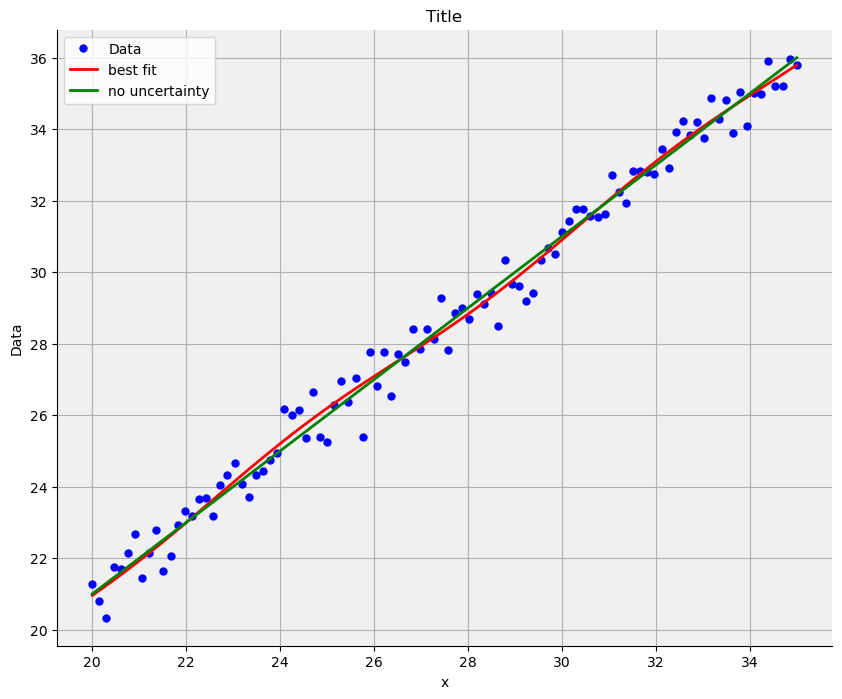

In [118]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(x, data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(x,yfit,color='r', linewidth=2, label = 'best fit')

ideal_data = sin_function([0, 1, 1, 1, 0], start, end, num, 0)

plt.plot(x,ideal_data,color='g', linewidth=2, label = 'no uncertainty')


# Set the plot title and axis labels
plt.title("Title")
plt.xlabel("x")
plt.ylabel("Data")
# plt.yscale("log")
plt.legend()

As we can see, the fit (red line) lines up well with the actual function (green line).

In [119]:
def fitfunction1(x,a,b,c,d,e):
        return a + b * x + c * np.sin(d * x + e)

init_vals = [1, 1, 1, 1, 1]

popt, pcov = curve_fit(fitfunction1, x, data, p0=init_vals)

print (popt)
print(np.diag(pcov))
# print (pcov)
yfit_new = []
chi2=0
for i in range (0,num):
    yfit_new.append(fitfunction(x[i],*popt))
    chi2 += (data[i]-yfit_new[i])*(data[i]-yfit_new[i])
    
print(x[30], yfit_new[30])

print ("Chi^2 / dof = %.3E / %d" % (chi2,num-len(init_vals)))

[1.4032102  0.98521948 0.173539   0.80367088 6.96855392]
[1.18837680e-01 1.54034664e-04 5.40543469e-03 9.58779119e-03
 7.74758590e+00]
24.545454545454547 25.893237456490724
Chi^2 / dof = 5.092E+01 / 95


Performing the same analysis on this fit as the previous one yields:
params(rounded and within uncertainties) = $[1, 1, 0.145, 0.705, 8.6]$
$$y(x) = 1 + x + 0.145\sin(0.705x + 8.6)$$
This function is clearly not the same as $y(x) = 1 + x$ because of the $0.145\sin(0.705x + 8.6)$ term. This term adds a very low amplitude sin wave with a period of about $\frac{2\pi}{0.705} \approx 8.9$

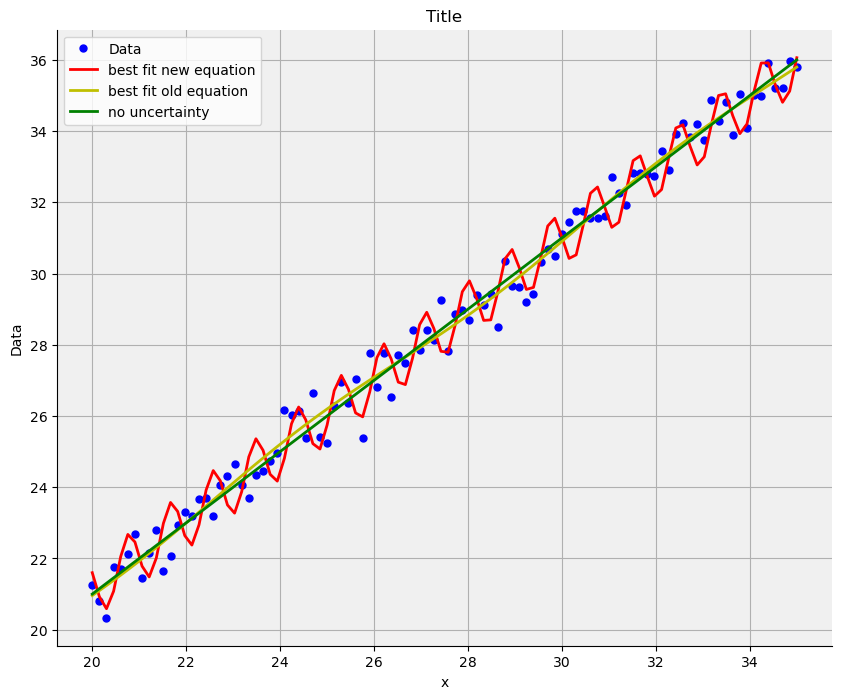

In [120]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(x, data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(x,yfit_new,color='r', linewidth=2, label = 'best fit new equation')

plt.plot(x,yfit,color='y', linewidth=2, label = 'best fit old equation')

plt.plot(x,ideal_data,color='g', linewidth=2, label = 'no uncertainty')

# Set the plot title and axis labels
plt.title("Title")
plt.xlabel("x")
plt.ylabel("Data")
# plt.yscale("log")
plt.legend()

I find this plot weird because it's not what the equation should make. Putting the parameters into desmos makes this plot:
![Plot](Desmos_graph.png "Expected plot from parameters")

The fit in the matplotlib plot looks worse than the original equation but in desmos using the fit parameters it looks about the same. Talking about how well the fits fit the data is a little tricky because we included gausian uncertainty so the theoretical parameters are not necessarily going to be the "optimal" parameters for the actual data. Either way, the lines seem to visually follow the data quite well.